In [35]:
# Import the much needed stuff for training
import pandas as pd
import numpy as np
import tensorflow as tf
import mediapipe as mp
import os
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

# Checking Tensorflow Version
tf_ver = str(tf.__version__)
tf.__version__

'2.18.0'

In [15]:

# dẫn vào folder training
Feature_Extraction_for_TRAINING_path = 'E:/Coding stuff/grpPRJ/GP/USTHGroupProject/demo v2 (cnn + mediapipe)/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training'
# grpPRJ/GP/USTHGroupProject/demo v2 (cnn + mediapipe)/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/training
# dẫn vào folder validate
Feature_Extraction_for_VALIDATION_path = 'E:/Coding stuff/grpPRJ/GP/USTHGroupProject/demo v2 (cnn + mediapipe)/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation'
# E:/Coding stuff/grpPRJ/GP/USTHGroupProject/demo v2 (cnn + mediapipe)/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation
# test image path
test_imgage_path = "E:/Coding stuff/grpPRJ/GP/USTHGroupProject/demo v2 (cnn + mediapipe)/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/test/F.jpg"


# không cần chỉnh
csv_train_path = "hands_training.csv"
csv_val_path = "hands_validation.csv"

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils 

In [5]:
# Function to Extract Feature from images or Frame
def extract_feature(input_image):
    image = cv.imread(input_image)
    with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1) as hands:
        while True:
            results = hands.process(cv.flip(cv.cvtColor(image, cv.COLOR_BGR2RGB), 1))
            image_height, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Handedness of {input_image}:')
            #print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            # Caution : Uncomment these print command will resulting long log of mediapipe log
            #print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                # Here we will set whole landmarks into zero as no handpose detected
                # in a picture wanted to extract.
                
                # Wrist Hand
                wristX = 0
                wristY = 0
                wristZ = 0
                
                # Thumb Finger
                thumb_CmcX = 0
                thumb_CmcY = 0
                thumb_CmcZ = 0
                
                thumb_McpX = 0
                thumb_McpY = 0
                thumb_McpZ = 0
                
                thumb_IpX = 0
                thumb_IpY = 0
                thumb_IpZ = 0
                
                thumb_TipX = 0
                thumb_TipY = 0
                thumb_TipZ = 0

                # Index Finger
                index_McpX = 0
                index_McpY = 0
                index_McpZ = 0
                
                index_PipX = 0
                index_PipY = 0
                index_PipZ = 0
                
                index_DipX = 0
                index_DipY = 0
                index_DipZ = 0
                
                index_TipX = 0
                index_TipY = 0
                index_TipZ = 0

                # Middle Finger
                middle_McpX = 0
                middle_McpY = 0
                middle_McpZ = 0
                
                middle_PipX = 0
                middle_PipY = 0
                middle_PipZ = 0
                
                middle_DipX = 0
                middle_DipY = 0
                middle_DipZ = 0
                
                middle_TipX = 0
                middle_TipY = 0
                middle_TipZ = 0

                # Ring Finger
                ring_McpX = 0
                ring_McpY = 0
                ring_McpZ = 0
                
                ring_PipX = 0
                ring_PipY = 0
                ring_PipZ = 0
                
                ring_DipX = 0
                ring_DipY = 0
                ring_DipZ = 0
                
                ring_TipX = 0
                ring_TipY = 0
                ring_TipZ = 0

                # Pinky Finger
                pinky_McpX = 0
                pinky_McpY = 0
                pinky_McpZ = 0
                
                pinky_PipX = 0
                pinky_PipY = 0
                pinky_PipZ = 0
                
                pinky_DipX = 0
                pinky_DipY = 0
                pinky_DipZ = 0
                
                pinky_TipX = 0
                pinky_TipY = 0
                pinky_TipZ = 0
                
                # Set image to Zero
                annotated_image = 0

                # Return Whole Landmark and Image
                return (wristX, wristY, wristZ,
                        thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                        thumb_McpX, thumb_McpY, thumb_McpZ,
                        thumb_IpX, thumb_IpY, thumb_IpZ,
                        thumb_TipX, thumb_TipY, thumb_TipZ,
                        index_McpX, index_McpY, index_McpZ,
                        index_PipX, index_PipY, index_PipZ,
                        index_DipX, index_DipY, index_DipZ,
                        index_TipX, index_TipY, index_TipZ,
                        middle_McpX, middle_McpY, middle_McpZ,
                        middle_PipX, middle_PipY, middle_PipZ,
                        middle_DipX, middle_DipY, middle_DipZ,
                        middle_TipX, middle_TipY, middle_TipZ,
                        ring_McpX, ring_McpY, ring_McpZ,
                        ring_PipX, ring_PipY, ring_PipZ,
                        ring_DipX, ring_DipY, ring_DipZ,
                        ring_TipX, ring_TipY, ring_TipZ,
                        pinky_McpX, pinky_McpY, pinky_McpZ,
                        pinky_PipX, pinky_PipY, pinky_PipZ,
                        pinky_DipX, pinky_DipY, pinky_DipZ,
                        pinky_TipX, pinky_TipY, pinky_TipZ,
                        annotated_image)
            
            annotated_image = cv.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # Wrist Hand /  Pergelangan Tangan
                wristX = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x * image_width
                wristY = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y * image_height
                wristZ = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].z

                # Thumb Finger / Ibu Jari
                thumb_CmcX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x * image_width
                thumb_CmcY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y * image_height
                thumb_CmcZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].z
                
                thumb_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x * image_width
                thumb_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y * image_height
                thumb_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].z
                
                thumb_IpX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x * image_width
                thumb_IpY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y * image_height
                thumb_IpZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].z
                
                thumb_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_height
                thumb_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].z

                # Index Finger / Jari Telunjuk
                index_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x * image_width
                index_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y * image_height
                index_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].z
                
                index_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x * image_width
                index_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y * image_height
                index_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].z
                
                index_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x * image_width
                index_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y * image_height
                index_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].z
                
                index_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height
                index_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].z

                # Middle Finger / Jari Tengah
                middle_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x * image_width
                middle_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y * image_height
                middle_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].z
                
                middle_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x * image_width
                middle_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y * image_height
                middle_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].z
                
                middle_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x * image_width
                middle_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y * image_height
                middle_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].z
                
                middle_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_height
                middle_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].z

                # Ring Finger / Jari Cincin
                ring_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x * image_width
                ring_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y * image_height
                ring_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].z
                
                ring_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x * image_width
                ring_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y * image_height
                ring_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].z
                
                ring_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x * image_width
                ring_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y * image_height
                ring_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].z
                
                ring_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_height
                ring_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].z

                # Pinky Finger / Jari Kelingking
                pinky_McpX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x * image_width
                pinky_McpY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y * image_height
                pinky_McpZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].z
                
                pinky_PipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x * image_width
                pinky_PipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y * image_height
                pinky_PipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].z
                
                pinky_DipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x * image_width
                pinky_DipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y * image_height
                pinky_DipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].z
                
                pinky_TipX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_TipY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_height
                pinky_TipZ = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].z

                # Draw the Skeleton
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
            return (wristX, wristY, wristZ,
                    thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                    thumb_McpX, thumb_McpY, thumb_McpZ,
                    thumb_IpX, thumb_IpY, thumb_IpZ,
                    thumb_TipX, thumb_TipY, thumb_TipZ,
                    index_McpX, index_McpY, index_McpZ,
                    index_PipX, index_PipY, index_PipZ,
                    index_DipX, index_DipY, index_DipZ,
                    index_TipX, index_TipY, index_TipZ,
                    middle_McpX, middle_McpY, middle_McpZ,
                    middle_PipX, middle_PipY, middle_PipZ,
                    middle_DipX, middle_DipY, middle_DipZ,
                    middle_TipX, middle_TipY, middle_TipZ,
                    ring_McpX, ring_McpY, ring_McpZ,
                    ring_PipX, ring_PipY, ring_PipZ,
                    ring_DipX, ring_DipY, ring_DipZ,
                    ring_TipX, ring_TipY, ring_TipZ,
                    pinky_McpX, pinky_McpY, pinky_McpZ,
                    pinky_PipX, pinky_PipY, pinky_PipZ,
                    pinky_DipX, pinky_DipY, pinky_DipZ,
                    pinky_TipX, pinky_TipY, pinky_TipZ,
                    annotated_image)

In [6]:
#Function to create CSV file or add dataset to the existed CSV file
def toCSV(filecsv, class_type,
          wristX, wristY, wristZ,
          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
          thumb_McpX, thumb_McpY, thumb_McpZ,
          thumb_IpX, thumb_IpY, thumb_IpZ,
          thumb_TipX, thumb_TipY, thumb_TipZ,
          index_McpX, index_McpY, index_McpZ,
          index_PipX, index_PipY, index_PipZ,
          index_DipX, index_DipY, index_DipZ,
          index_TipX, index_TipY, index_TipZ,
          middle_McpX, middle_McpY, middle_McpZ,
          middle_PipX, middle_PipY, middle_PipZ,
          middle_DipX, middle_DipY, middle_DipZ,
          middle_TipX, middle_TipY, middle_TipZ,
          ring_McpX, ring_McpY, ring_McpZ,
          ring_PipX, ring_PipY, ring_PipZ,
          ring_DipX, ring_DipY, ring_DipZ,
          ring_TipX, ring_TipY, ring_TipZ,
          pinky_McpX, pinky_McpY, pinky_McpZ,
          pinky_PipX, pinky_PipY, pinky_PipZ,
          pinky_DipX, pinky_DipY, pinky_DipZ,
          pinky_TipX, pinky_TipY, pinky_TipZ):
    if os.path.isfile(filecsv):
        #print ("File exist thus shall write append to the file")
        with open(filecsv, 'a+', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])
    else:
        #print ("File not exist thus shall create new file as", filecsv)
        with open(filecsv, 'w', newline='') as file:
            # Create a writer object from csv module
            writer = csv.writer(file)
            writer.writerow(["class_type",
                             "wristX", "wristY", "wristZ",
                             "thumb_CmcX", "thumb_CmcY", "thumb_CmcZ",
                             "thumb_McpX", "thumb_McpY", "thumb_McpZ",
                             "thumb_IpX", "thumb_IpY", "thumb_IpZ",
                             "thumb_TipX", "thumb_TipY", "thumb_TipZ",
                             "index_McpX", "index_McpY", "index_McpZ",
                             "index_PipX", "index_PipY", "index_PipZ",
                             "index_DipX", "index_DipY", "index_DipZ",
                             "index_TipX", "index_TipY", "index_TipZ",
                             "middle_McpX", "middle_McpY", "middle_McpZ",
                             "middle_PipX", "middle_PipY", "middle_PipZ",
                             "middle_DipX", "middle_DipY", "middle_DipZ",
                             "middle_TipX", "middle_TipY", "middle_TipZ",
                             "ring_McpX", "ring_McpY", "ring_McpZ",
                             "ring_PipX", "ring_PipY", "ring_PipZ",
                             "ring_DipX", "ring_DipY", "ring_DipZ",
                             "ring_TipX", "ring_TipY", "ring_TipZ",
                             "pinky_McpX", "pinky_McpY", "pinky_McpZ",
                             "pinky_PipX", "pinky_PipY", "pinky_PipZ",
                             "pinky_DipX", "pinky_DipY", "pinky_DipZ",
                             "pinky_TipX", "pinky_TipY", "pinky_TipZ"])
            writer.writerow([class_type,
                             wristX, wristY, wristZ,
                             thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                             thumb_McpX, thumb_McpY, thumb_McpZ,
                             thumb_IpX, thumb_IpY, thumb_IpZ,
                             thumb_TipX, thumb_TipY, thumb_TipZ,
                             index_McpX, index_McpY, index_McpZ,
                             index_PipX, index_PipY, index_PipZ,
                             index_DipX, index_DipY, index_DipZ,
                             index_TipX, index_TipY, index_TipZ,
                             middle_McpX, middle_McpY, middle_McpZ,
                             middle_PipX, middle_PipY, middle_PipZ,
                             middle_DipX, middle_DipY, middle_DipZ,
                             middle_TipX, middle_TipY, middle_TipZ,
                             ring_McpX, ring_McpY, ring_McpZ,
                             ring_PipX, ring_PipY, ring_PipZ,
                             ring_DipX, ring_DipY, ring_DipZ,
                             ring_TipX, ring_TipY, ring_TipZ,
                             pinky_McpX, pinky_McpY, pinky_McpZ,
                             pinky_PipX, pinky_PipY, pinky_PipZ,
                             pinky_DipX, pinky_DipY, pinky_DipZ,
                             pinky_TipX, pinky_TipY, pinky_TipZ])

In [9]:
# Extract Feature for Training
# We will using SIBI datasets version V02
paths = Feature_Extraction_for_TRAINING_path
csv_path = "hands_training.csv"

if os.path.exists(csv_path):
    print("CSV File exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")
    
for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))
            
                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist, 
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)
                
                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")

print("===================Feature Extraction for TRAINING is Completed===================")

The CSV file does not exist hands_training.csv ,Going Create after Extraction
Inside Folder A Consist : 80 Imageset
Inside Folder B Consist : 80 Imageset
Inside Folder F Consist : 80 Imageset
Inside Folder L Consist : 80 Imageset
Inside Folder W Consist : 80 Imageset
Inside Folder Y Consist : 80 Imageset
===================Feature Extraction for TRAINING is Completed===================


In [16]:
# Extract Feature for Validation
# We will using SIBI datasets version V02
paths = Feature_Extraction_for_VALIDATION_path
csv_path = "hands_validation.csv"

if os.path.exists(csv_path):
    print("CSV File does exist, going delete before start extraction and replace it with new")
    os.remove(csv_path)
else:
    print("The CSV file does not exist", csv_path, ",Going Create after Extraction")
    
for dirlist in os.listdir(paths):
    for root, directories, filenames in os.walk(os.path.join(paths, dirlist)):
        print("Inside Folder", dirlist, "Consist :", len(filenames), "Imageset")
        for filename in filenames:
            if filename.endswith(".jpg") or filename.endswith(".JPG"):
                #print(os.path.join(root, filename), True)
                (wristX, wristY, wristZ,
                 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                 thumb_McpX, thumb_McpY, thumb_McpZ,
                 thumb_IpX, thumb_IpY, thumb_IpZ,
                 thumb_TipX, thumb_TipY, thumb_TipZ,
                 index_McpX, index_McpY, index_McpZ,
                 index_PipX, index_PipY, index_PipZ,
                 index_DipX, index_DipY, index_DipZ,
                 index_TipX, index_TipY, index_TipZ,
                 middle_McpX, middle_McpY, middle_McpZ,
                 middle_PipX, middle_PipY, middle_PipZ,
                 middle_DipX, middle_DipY, middle_DipZ,
                 middle_TipX, middle_TipY, middle_TipZ,
                 ring_McpX, ring_McpY, ring_McpZ,
                 ring_PipX, ring_PipY, ring_PipZ,
                 ring_DipX, ring_DipY, ring_DipZ,
                 ring_TipX, ring_TipY, ring_TipZ,
                 pinky_McpX, pinky_McpY, pinky_McpZ,
                 pinky_PipX, pinky_PipY, pinky_PipZ,
                 pinky_DipX, pinky_DipY, pinky_DipZ,
                 pinky_TipX, pinky_TipY, pinky_TipZ,
                 annotated_image) = extract_feature(os.path.join(root, filename))
            
                if ((not wristX == 0) and (not wristY == 0)):
                    toCSV(csv_path, dirlist, 
                          wristX, wristY, wristZ,
                          thumb_CmcX, thumb_CmcY, thumb_CmcZ,
                          thumb_McpX, thumb_McpY, thumb_McpZ,
                          thumb_IpX, thumb_IpY, thumb_IpZ,
                          thumb_TipX, thumb_TipY, thumb_TipZ,
                          index_McpX, index_McpY, index_McpZ,
                          index_PipX, index_PipY, index_PipZ,
                          index_DipX, index_DipY, index_DipZ,
                          index_TipX, index_TipY, index_TipZ,
                          middle_McpX, middle_McpY, middle_McpZ,
                          middle_PipX, middle_PipY, middle_PipZ,
                          middle_DipX, middle_DipY, middle_DipZ,
                          middle_TipX, middle_TipY, middle_TipZ,
                          ring_McpX, ring_McpY, ring_McpZ,
                          ring_PipX, ring_PipY, ring_PipZ,
                          ring_DipX, ring_DipY, ring_DipZ,
                          ring_TipX, ring_TipY, ring_TipZ,
                          pinky_McpX, pinky_McpY, pinky_McpZ,
                          pinky_PipX, pinky_PipY, pinky_PipZ,
                          pinky_DipX, pinky_DipY, pinky_DipZ,
                          pinky_TipX, pinky_TipY, pinky_TipZ,)
                
                else :
                    print(os.path.join(root, filename), "Hand does not have landmarks")
                
print("===================Feature Extraction for VALIDATION is Completed===================")

The CSV file does not exist hands_validation.csv ,Going Create after Extraction
Inside Folder A Consist : 15 Imageset
Inside Folder B Consist : 17 Imageset
E:/Coding stuff/grpPRJ/GP/USTHGroupProject/demo v2 (cnn + mediapipe)/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/SIBI_datasets_LEMLITBANG_SIBI_R_90.10_V02/validation\B\20210607_165548.jpg Hand does not have landmarks
Inside Folder F Consist : 15 Imageset
Inside Folder L Consist : 17 Imageset
Inside Folder W Consist : 17 Imageset
Inside Folder Y Consist : 15 Imageset
===================Feature Extraction for VALIDATION is Completed===================


In [18]:
# Read CSV file for Training the model using Pandas
df_train = pd.read_csv("hands_training.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_train = df_train.sort_values(by=["class_type"])

df_train

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
0,A,77.363548,558.203659,-5.207517e-07,126.049762,545.792160,-0.027789,166.783147,504.378815,-0.030557,...,-0.014933,83.286123,434.598656,-0.038530,82.070396,462.206001,-0.018673,71.975734,466.821747,0.003144
57,A,62.150202,494.894066,1.599057e-07,77.341461,506.039658,-0.017876,79.500604,525.138931,-0.019872,...,0.025619,48.234962,539.334335,0.031995,52.791882,544.128304,0.036864,56.594059,544.293518,0.040383
56,A,416.407700,494.228363,2.899163e-07,400.570679,505.814590,-0.018884,399.650345,525.581017,-0.021009,...,0.021419,430.262260,539.426575,0.024877,425.513134,545.563469,0.026321,421.016750,547.996597,0.027210
55,A,62.798059,482.163811,1.688873e-07,78.370006,493.143654,-0.016415,80.517676,512.288246,-0.017055,...,0.025321,49.616954,526.747704,0.030930,53.000611,532.873154,0.034828,56.441588,534.952660,0.037551
54,A,415.861502,481.091843,2.529603e-07,399.881916,493.360863,-0.015728,398.935089,513.232689,-0.015956,...,0.021654,429.302473,524.467316,0.024503,425.815916,531.221619,0.025494,422.003374,534.687805,0.026183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,Y,64.862866,185.327301,-6.027831e-07,84.245317,168.047562,-0.032113,94.671707,140.077972,-0.043214,...,-0.004230,27.008504,99.334402,-0.020675,17.331372,86.948614,-0.022701,9.367007,75.577135,-0.016871
421,Y,411.588821,180.009251,-5.065812e-07,391.284399,169.019623,-0.024188,377.875729,137.328424,-0.033279,...,-0.012450,447.342796,94.148684,-0.024974,456.106024,82.334547,-0.023512,462.122068,70.802689,-0.017521
419,Y,71.324408,177.400093,-6.514175e-07,92.945323,160.806427,-0.024525,104.199207,129.812727,-0.029206,...,-0.005013,36.636754,90.832701,-0.022637,26.934822,77.548399,-0.027664,18.621869,65.173697,-0.024348
438,Y,149.244289,403.020782,-5.528476e-07,131.820474,372.542305,0.000392,127.358336,336.979752,-0.006747,...,-0.032860,222.894015,336.152687,-0.030794,232.790279,322.360115,-0.024429,240.070324,308.778839,-0.021542


In [19]:
# Read CSV file for Validation or Testing the Model using Pandas
df_test = pd.read_csv("hands_validation.csv", header=0)

# First we must sort the values of the dataset according to the Alphabets
df_test = df_test.sort_values(by=["class_type"])

df_test.head()

,class_type,wristX,wristY,wristZ,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
0,A,400.716105,444.068985,-1.762786e-06,341.627283,423.760300,-0.041537,286.769085,370.928574,-0.061643,...,-0.049767,412.068443,278.923225,-0.086544,408.199110,326.535912,-0.051126,418.964310,338.287735,-0.013546
14,A,46.009884,336.254616,-7.629065e-07,73.037803,305.992889,-0.005141,86.062138,271.522121,-0.000554,...,0.004424,10.713663,242.403336,-0.001492,19.580297,261.294365,0.015861,24.395851,269.217072,0.033482
13,A,449.290380,339.073982,-7.123556e-07,421.108704,307.098770,0.007395,406.683998,277.594452,0.019810,...,0.027165,472.675610,245.847855,0.032444,460.406084,262.283936,0.049375,459.492617,270.243206,0.065027
12,A,207.730322,547.673035,-1.471810e-06,297.842703,514.847603,-0.074210,357.619514,439.111404,-0.113330,...,-0.113557,188.962326,397.661057,-0.178263,204.057970,444.474754,-0.162121,188.065710,441.047325,-0.138050
11,A,272.681007,549.574661,-2.288062e-06,183.948827,517.672119,-0.070738,125.471907,443.776093,-0.107775,...,-0.115764,286.740475,386.303520,-0.171658,272.612801,437.191772,-0.139921,290.467644,432.604370,-0.104147


In [20]:
# Put Categorical using Pandas
df_train["class_type"] = pd.Categorical(df_train["class_type"])
df_train["class_type"] = df_train.class_type.cat.codes

df_test["class_type"] = pd.Categorical(df_test["class_type"])
df_test["class_type"] = df_test.class_type.cat.codes

In [21]:
# Copy Label and Feature for training
y_train = df_train.pop("class_type")
x_train = df_train.copy()

y_test = df_test.pop("class_type")
x_test = df_test.copy()

# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)
x_test = np.array(x_test)

In [22]:
# Check Array Shape before transformation
print(x_train.shape)
print(x_test.shape)

# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Check Array Shape after transformation
print(x_train.shape)
print(x_test.shape)

(480, 63)
(95, 63)
(480, 63, 1)
(95, 63, 1)


In [23]:
# Check sample train and test features
print(x_train[0])
print(x_test[7])

[[ 77.364]
 [558.204]
 [ -0.   ]
 [126.05 ]
 [545.792]
 [ -0.028]
 [166.783]
 [504.379]
 [ -0.031]
 [186.158]
 [467.121]
 [ -0.033]
 [198.529]
 [436.754]
 [ -0.026]
 [152.09 ]
 [455.02 ]
 [  0.005]
 [173.049]
 [433.994]
 [ -0.032]
 [157.44 ]
 [473.051]
 [ -0.046]
 [145.128]
 [484.801]
 [ -0.049]
 [124.863]
 [446.818]
 [  0.004]
 [143.34 ]
 [430.823]
 [ -0.033]
 [130.   ]
 [475.21 ]
 [ -0.038]
 [119.76 ]
 [478.615]
 [ -0.033]
 [ 95.262]
 [445.715]
 [ -0.004]
 [113.182]
 [429.403]
 [ -0.046]
 [105.252]
 [471.018]
 [ -0.029]
 [ 95.119]
 [474.649]
 [ -0.007]
 [ 63.42 ]
 [448.113]
 [ -0.015]
 [ 83.286]
 [434.599]
 [ -0.039]
 [ 82.07 ]
 [462.206]
 [ -0.019]
 [ 71.976]
 [466.822]
 [  0.003]]
[[345.599]
 [427.827]
 [ -0.   ]
 [258.063]
 [401.598]
 [ -0.059]
 [185.514]
 [310.129]
 [ -0.068]
 [143.724]
 [230.78 ]
 [ -0.078]
 [111.282]
 [168.669]
 [ -0.067]
 [212.075]
 [223.179]
 [  0.011]
 [176.52 ]
 [163.386]
 [ -0.077]
 [198.871]
 [241.936]
 [ -0.103]
 [218.005]
 [256.962]
 [ -0.107]
 [277.069

In [24]:
# Number of classes according standard Indonesian Language Alphabets
labels = [f.name for f in os.scandir(Feature_Extraction_for_VALIDATION_path) if f.is_dir()]
# print(labels)
# print(len(labels))
num_classes = len(labels)

# Using the Keras.Utils to put the label categorically 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [25]:
x_train.shape

(480, 63, 1)

In [26]:
# One Dimensional Convolutional Neural Network model, Train will be feed to 1 Dimension Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=5, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(num_classes, activation='softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

e:\anaconda\Anaconda\envs\GP\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 63, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 63, 32)         │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 31, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 31, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 31, 64)         │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 15, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 15, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 7, 256)         │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 7, 256)         │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,048,166 (4.00 MB)

 Trainable params: 1,048,166 (4.00 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
logdir='logs'
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir='./logs')

In [28]:
#Train the Model
hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.1936 - loss: 2.7300 - val_accuracy: 0.1579 - val_loss: 1.7976
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1494 - loss: 1.8029 - val_accuracy: 0.1579 - val_loss: 1.7863
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2124 - loss: 1.7724 - val_accuracy: 0.2421 - val_loss: 1.7334
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2755 - loss: 1.6723 - val_accuracy: 0.2842 - val_loss: 1.5079
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3648 - loss: 1.4053 - val_accuracy: 0.4421 - val_loss: 1.2279
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4873 - loss: 1.0908 - val_accuracy: 0.4947 - val_loss: 1.1832
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5766 - loss: 0.9455 - val_accuracy: 0.6421 - val_loss: 0.7753
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6568 - loss: 0.6845 - val_accuracy: 0.

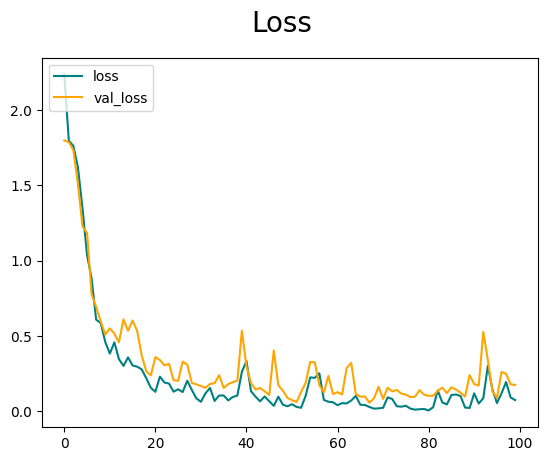

In [29]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

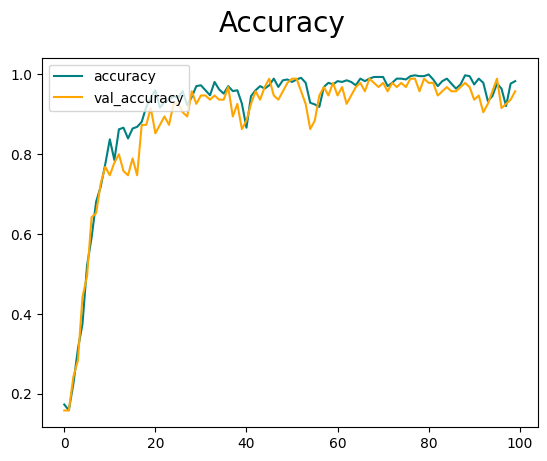

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


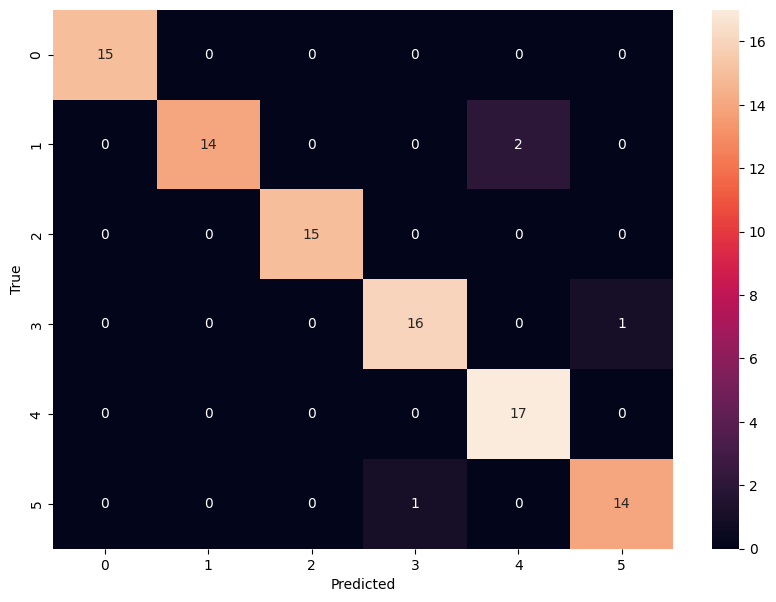

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        15
           3       0.94      0.94      0.94        17
           4       0.89      1.00      0.94        17
           5       0.93      0.93      0.93        15

    accuracy                           0.96        95
   macro avg       0.96      0.96      0.96        95
weighted avg       0.96      0.96      0.96        95



In [36]:

def print_confusion_matrix(y_true, y_pred, report=True):
    # Ensure y_true and y_pred are of the same type
    y_true = np.argmax(y_true, axis=1) if len(y_true.shape) > 1 else y_true
    y_pred = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else y_pred

    labels = np.unique(y_true)
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cmx, annot=True, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    if report:
        print(classification_report(y_true, y_pred))




Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


In [37]:
val_loss, val_acc = model.evaluate(x_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9516 - loss: 0.1902 


In [38]:
model_name = 'model' + tf_ver + '.keras'
model.save(model_name)

In [39]:
model = tf.keras.models.load_model(model_name)

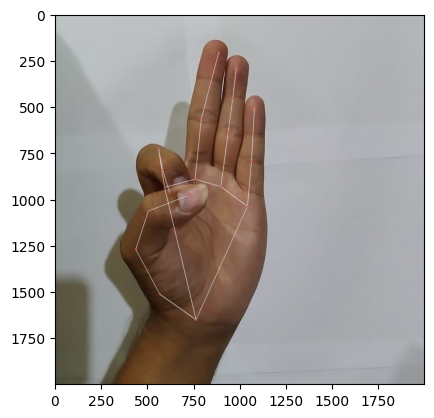

In [40]:
# Directly from Imageset Dataset Testing
#Load Image and do Feature Extraction
path_to_image = test_imgage_path

(wristX, wristY, wristZ,
 thumb_CmcX, thumb_CmcY, thumb_CmcZ,
 thumb_McpX, thumb_McpY, thumb_McpZ,
 thumb_IpX, thumb_IpY, thumb_IpZ,
 thumb_TipX, thumb_TipY, thumb_TipZ,
 index_McpX, index_McpY, index_McpZ,
 index_PipX, index_PipY, index_PipZ,
 index_DipX, index_DipY, index_DipZ,
 index_TipX, index_TipY, index_TipZ,
 middle_McpX, middle_McpY, middle_McpZ,
 middle_PipX, middle_PipY, middle_PipZ,
 middle_DipX, middle_DipY, middle_DipZ,
 middle_TipX, middle_TipY, middle_TipZ,
 ring_McpX, ring_McpY, ring_McpZ,
 ring_PipX, ring_PipY, ring_PipZ,
 ring_DipX, ring_DipY, ring_DipZ,
 ring_TipX, ring_TipY, ring_TipZ,
 pinky_McpX, pinky_McpY, pinky_McpZ,
 pinky_PipX, pinky_PipY, pinky_PipZ,
 pinky_DipX, pinky_DipY, pinky_DipZ,
 pinky_TipX, pinky_TipY, pinky_TipZ,
 output_IMG) = extract_feature(path_to_image)

#print(wristX, wristY,
#      thumb_CmcX, thumb_CmcY, thumb_McpX, thumb_McpY, thumb_IpX, thumb_IpY, thumb_TipX, thumb_TipY,
#      index_McpX, index_McpY, index_PipX, index_PipY, index_DipX, index_DipY, index_TipX, index_TipY,
#      middle_McpX, middle_McpY, middle_PipX, middle_PipY, middle_DipX, middle_DipY, middle_TipX, middle_TipY,
#      ring_McpX, ring_McpY, ring_PipX, ring_PipY, ring_DipX, ring_DipY, ring_TipX, ring_TipY,
#      pinky_McpX, pinky_McpY, pinky_PipX, pinky_PipY, pinky_DipX, pinky_DipY, pinky_TipX, pinky_TipY)
# plt.axis("on")
plt.imshow(cv.cvtColor(output_IMG, cv.COLOR_BGR2RGB))
plt.show()

In [41]:
#Shape the image features into an 1x3 array.
input_IMG = np.array([[[wristX], [wristY], [wristZ],
                     [thumb_CmcX], [thumb_CmcY], [thumb_CmcZ],
                     [thumb_McpX], [thumb_McpY], [thumb_McpZ],
                     [thumb_IpX], [thumb_IpY], [thumb_IpZ],
                     [thumb_TipX], [thumb_TipY], [thumb_TipZ],
                     [index_McpX], [index_McpY], [index_McpZ],
                     [index_PipX], [index_PipY], [index_PipZ],
                     [index_DipX], [index_DipY], [index_DipZ],
                     [index_TipX], [index_TipY], [index_TipZ],
                     [middle_McpX], [middle_McpY], [middle_McpZ],
                     [middle_PipX], [middle_PipY], [middle_PipZ],
                     [middle_DipX], [middle_DipY], [middle_DipZ],
                     [middle_TipX], [middle_TipY], [middle_TipZ],
                     [ring_McpX], [ring_McpY], [ring_McpZ],
                     [ring_PipX], [ring_PipY], [ring_PipZ],
                     [ring_DipX], [ring_DipY], [ring_DipZ],
                     [ring_TipX], [ring_TipY], [ring_TipZ],
                     [pinky_McpX], [pinky_McpY], [pinky_McpZ],
                     [pinky_PipX], [pinky_PipY], [pinky_PipZ],
                     [pinky_DipX], [pinky_DipY], [pinky_DipZ],
                     [pinky_TipX], [pinky_TipY], [pinky_TipZ]]])

print(input_IMG.shape)
print(input_IMG)

(1, 63, 1)
[[[ 762.664]
  [1652.198]
  [   0.   ]
  [ 566.401]
  [1514.177]
  [  -0.065]
  [ 436.246]
  [1272.182]
  [  -0.109]
  [ 504.037]
  [1065.266]
  [  -0.155]
  [ 718.968]
  [ 981.999]
  [  -0.193]
  [ 592.563]
  [ 937.279]
  [  -0.025]
  [ 559.98 ]
  [ 727.591]
  [  -0.117]
  [ 581.016]
  [ 841.908]
  [  -0.193]
  [ 619.513]
  [ 965.012]
  [  -0.231]
  [ 757.31 ]
  [ 892.269]
  [  -0.03 ]
  [ 790.935]
  [ 569.851]
  [  -0.076]
  [ 838.01 ]
  [ 384.239]
  [  -0.114]
  [ 885.186]
  [ 206.132]
  [  -0.142]
  [ 896.686]
  [ 933.033]
  [  -0.054]
  [ 936.733]
  [ 638.065]
  [  -0.094]
  [ 960.044]
  [ 458.691]
  [  -0.119]
  [ 980.005]
  [ 289.806]
  [  -0.134]
  [1040.484]
  [1039.677]
  [  -0.086]
  [1062.922]
  [ 792.423]
  [  -0.103]
  [1070.743]
  [ 644.817]
  [  -0.105]
  [1077.576]
  [ 508.501]
  [  -0.106]]]


In [42]:
# Replace 'your_directory_path' with the path to your directory
directory_path = Feature_Extraction_for_VALIDATION_path

# List all subdirectories using os.listdir()
labels = [f.name for f in os.scandir(directory_path) if f.is_dir()]
print(labels)
print(len(labels))

['A', 'B', 'F', 'L', 'W', 'Y']
6


In [43]:
#Print the Prediction
pred = model.predict(input_IMG)
print(pred)
# print(model.predict_classes(input_IMG))
max_position = np.argmax(pred)
labels[max_position]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
[[0. 0. 1. 0. 0. 0.]]


'F'